In [1]:
%run ../ourFunctions.py

In [2]:
df = pd.read_csv('../data/BirthWeights.csv')[["sex", "dbirwt"]]
df = df[(df[ "dbirwt"] < 6000) & (df[ "dbirwt"] > 2000)] # 2000 < birthweight < 6000
df.head()

,sex,dbirwt
0,male,2551
1,male,2778
2,female,2976
3,female,3345
4,female,3175


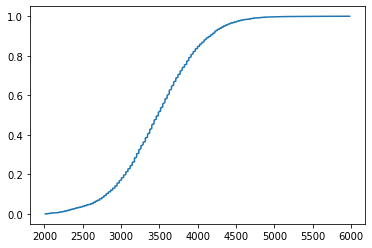

In [3]:
x, y = ecdf(df["dbirwt"])
plt.plot(x,y);

### Tasks

1. Take a random sample of size 100 of the birth weights. With that sample:

2. Using the `draw_bs_reps` function, find a 95% confidence interval of the **true mean birth weight**.

2. Using the `draw_bs_reps` function, find a 95% confidence interval of the **true stdev of the birth weights**

In [4]:
np.random.seed(42)
#taking 100 samples mean
bs_100_mu = draw_bs_reps(df["dbirwt"], np.mean, size=400)
conf95_int_mu = np.quantile(bs_100_mu, (0.025, 0.975))

print("conf_int =", np.round(conf95_int_mu, 2))
print("true mean =", np.mean(df["dbirwt"]))

conf_int = [3465.71 3495.05]
true mean = 3480.557343654512


In [5]:
#taking 100 samples std
bs_100_std = draw_bs_reps(df["dbirwt"], np.std, size=100)
np.round(np.percentile(bs_100_mu, [2.5, 97.5]),2)

array([3465.71, 3495.05])

### Corona Vaccine

Study enrolled 43,538 participants for an even split of placebo/vaccination.
The trial had **162 confirmed cases** of symptomatic COVID-19 in the placebo group versus **eight** among those who received the two scheduled doses of the vaccine. 

The efficiency is then defined as : $$ 1- {\frac}{(8/21769)}{(162/21769)} = 95%$$

Task: Using the `draw_bs_reps` function, find a 95% conf interval of the true vaccine efficency 

In [8]:
Inf = [8,162]

CIupper = np.exp(np.log(Inf[0]/Inf[1]) + 1.96*np.sqrt(1/Inf[0] + 1/Inf[1] + 1/(21769-Inf[0]) + 1/(21769-Inf[1])))
1-np.round(CIupper,3)

0.9

In [22]:
M=5000

#Construct arrays of data: 
Vaccinated = np.array([True] * Inf[0] + [False] * (21769 - Inf[0]))
NotVaccinated = np.array([True] * Inf[1] + [False] * (21769 - Inf[1]))

# Compute 1,000 bootstrap replicates from shifted arrays
bs_replicates_V = draw_bs_reps(Vaccinated, np.sum, size=M)
bs_replicates_NV = draw_bs_reps(NotVaccinated, np.sum, size=M)

#relative risks:
RR =bs_replicates_V/bs_replicates_NV

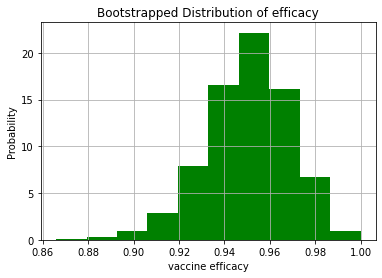

0.91

In [23]:
tmp=plt.hist(1-RR,density=True, facecolor='g')
plt.xlabel('vaccine efficacy')
plt.ylabel('Probability')
plt.title('Bootstrapped Distribution of efficacy')
plt.grid(True)
plt.show()
#LowerBoundEfficiency 
np.round(np.quantile(1-RR,0.025),3)

Check Hypothesis


In [24]:
efficiency_bs = 1-RR
#this is my test statistic:
efficiency_bs_shifted = efficiency_bs - (np.mean(efficiency_bs) - 0.9)

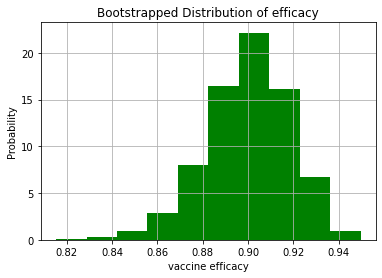

0.91

In [25]:
tmp=plt.hist(efficiency_bs_shifted,density=True, facecolor='g')
plt.xlabel('vaccine efficacy')
plt.ylabel('Probability')
plt.title('Bootstrapped Distribution of efficacy')
plt.grid(True)
plt.show()
#LowerBoundEfficiency 
np.round(np.quantile(1-RR,0.025),3)

In [26]:
obs_efficiency = np.mean(efficiency_bs)
p = np.mean(efficiency_bs_shifted >= obs_efficiency)
print('p-value =', p)

p-value = 0.0


### Two sample bootstrap hypothesis test